# Azted G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()


In [3]:
sim_df.current_process.map(lambda x: x.leading_sequencer if x is not None else None).dropna().value_counts()

current_process
c64c6e52-5d01-4f49-88f6-04d5d77630b9    143
3a921efd-294f-4363-bab6-036c39b40206     92
0322fd5e-ca06-43a6-b7c3-88ab9ba92f70     65
Name: count, dtype: int64

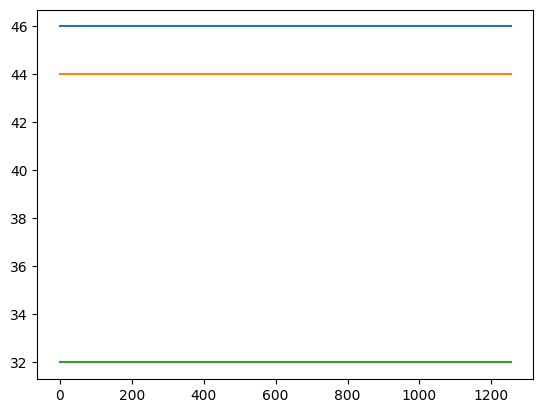

In [4]:
agent_labels = [i for i in sim_df['agents'].iloc[0].keys() if type(i) != str]
x = sim_df.time_l1
fig_df = sim_df.copy()
for i in agent_labels:
    fig_df[f'agent_{i}_staked'] = sim_df.agents.map(lambda x: x[i].staked_amount)
    y_i = fig_df[f'agent_{i}_staked']
    plt.plot(x, y_i)

<Axes: >

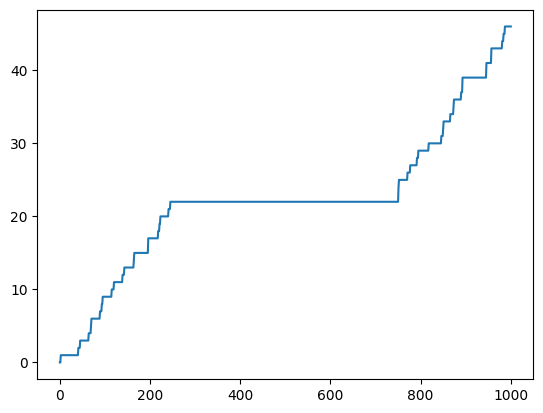

In [5]:
sim_df.transactions.map(lambda x: len(x))

from aztec_gddt.types import *

fig_df['proposal_tx_count'] = sim_df.transactions.map(lambda tx_dict: len(list(v for v in tx_dict.values() if isinstance(v, Proposal))))
fig_df.proposal_tx_count.plot()

In [6]:
fig_df.proposal_tx_count

0        0
1        0
2        1
3        1
4        1
        ..
996     46
997     46
998     46
999     46
1000    46
Name: proposal_tx_count, Length: 1001, dtype: int64

<Axes: xlabel='timestep', ylabel='time_l1'>

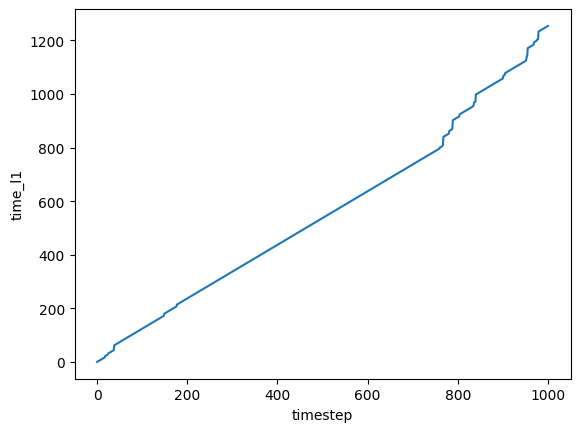

In [7]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [8]:
sim_df.head(4)

,subset,simulation,run,timestep,time_l1,delta_l1_blocks,advance_l1_blocks,slashes_to_provers,slashes_to_sequencers,total_rewards_provers,...,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,gas_estimators,tx_estimators,slash_params,commit_bond_amount,op_cost_sequencer
0,0,0,1,0,0,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
1,0,0,1,1,1,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
2,0,0,1,2,2,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
3,0,0,1,3,3,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0


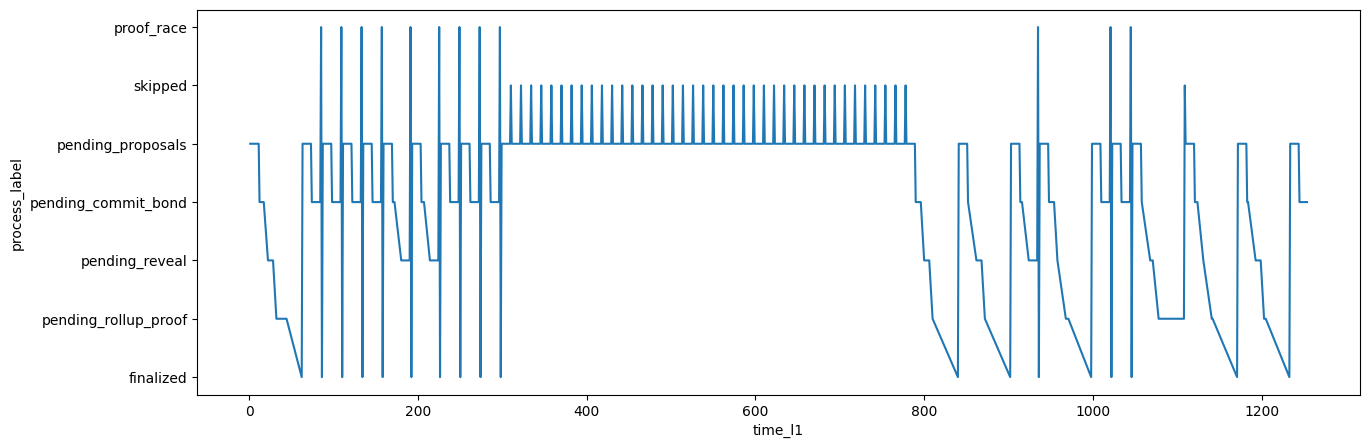

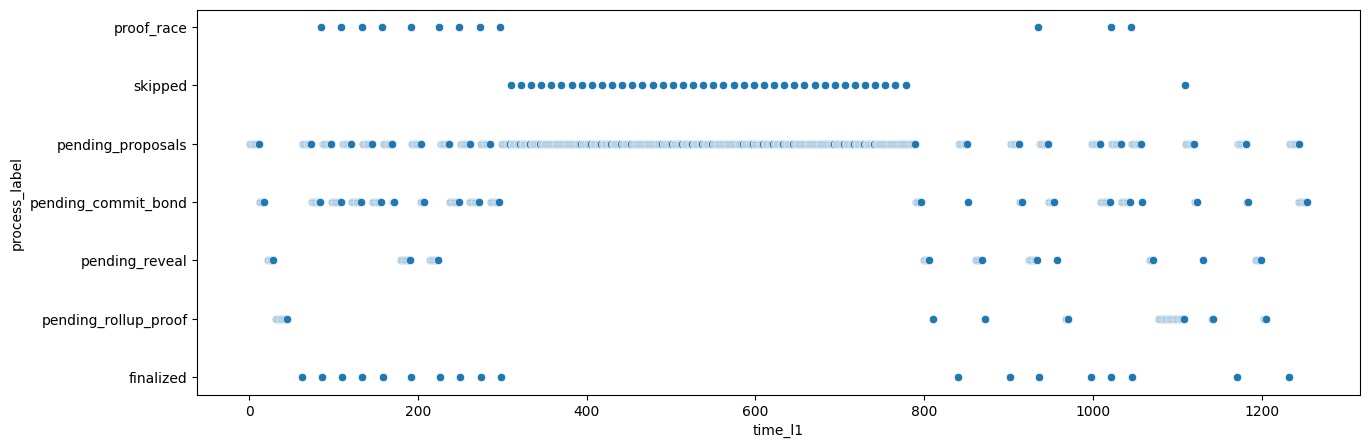

In [9]:
fig_df = sim_df.copy()
fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1, 
             y=fig_df.process_label)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=fig_df.time_l1, 
             y=fig_df.process_label)
plt.show()

In [10]:
fig_df.set_index('time_l1').sort_index().process_label

time_l1
0                      None
1         pending_proposals
2         pending_proposals
3         pending_proposals
4         pending_proposals
               ...         
1250    pending_commit_bond
1251    pending_commit_bond
1252    pending_commit_bond
1253    pending_commit_bond
1254    pending_commit_bond
Name: process_label, Length: 1001, dtype: object

In [11]:
sim_df.iloc[-1]

subset                                                                                   0
simulation                                                                               0
run                                                                                      1
timestep                                                                              1000
time_l1                                                                               1254
delta_l1_blocks                                                                          0
advance_l1_blocks                                                                        0
slashes_to_provers                                                                     1.0
slashes_to_sequencers                                                                  9.0
total_rewards_provers                                                             1.449664
total_rewards_relays                                                              0.048322

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

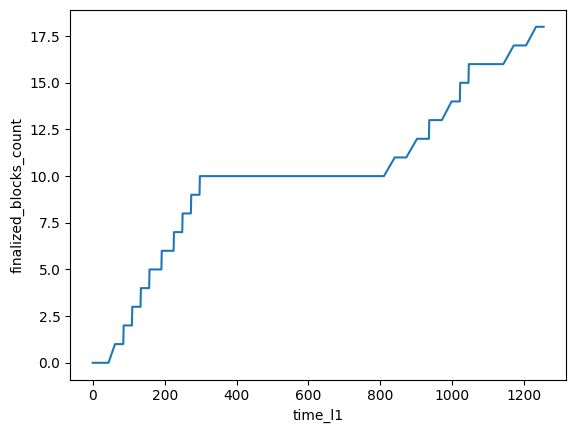

In [12]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

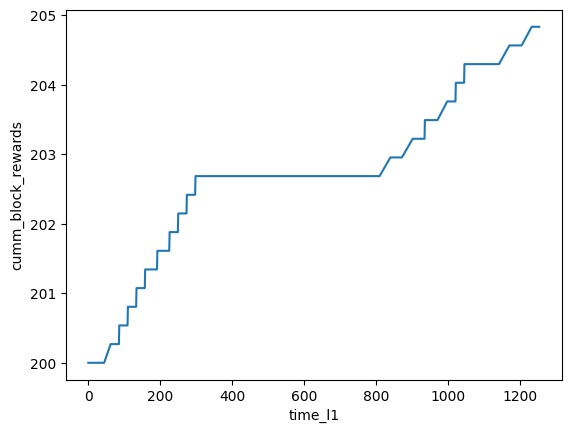

In [13]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

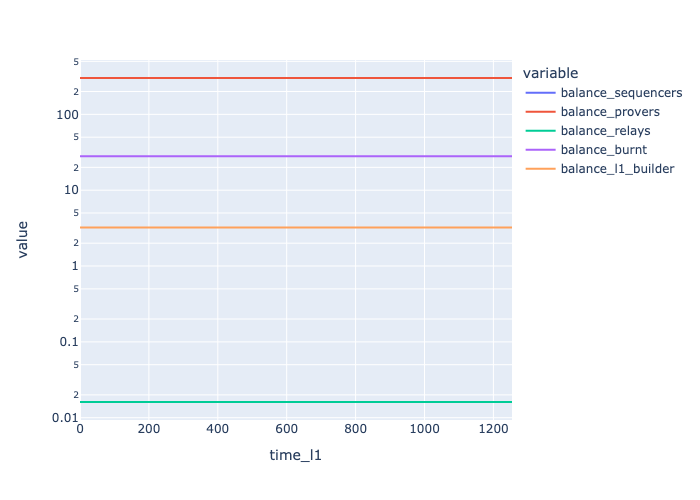

In [14]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)

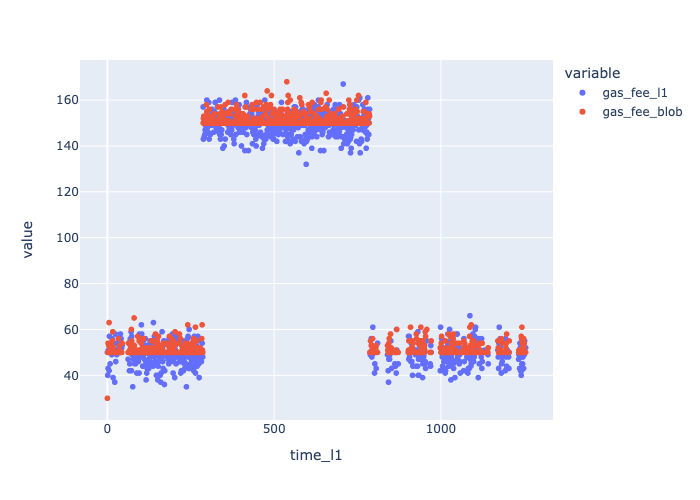

In [15]:
px.scatter(sim_df,
        x='time_l1',
        y=['gas_fee_l1', 'gas_fee_blob'])

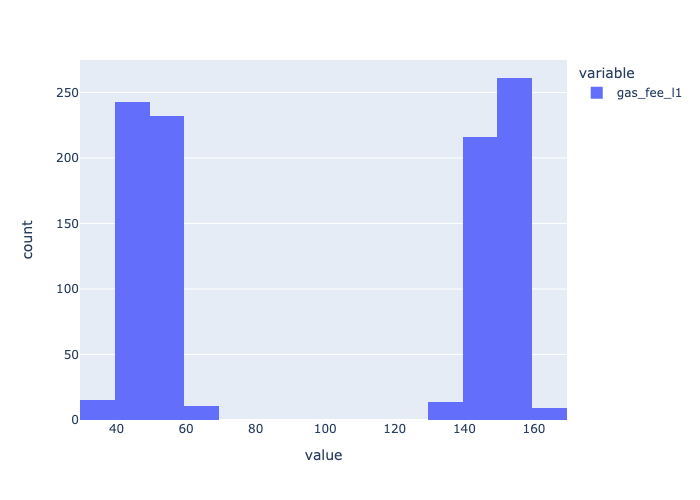

In [16]:
px.histogram(sim_df,
        x=['gas_fee_l1'])

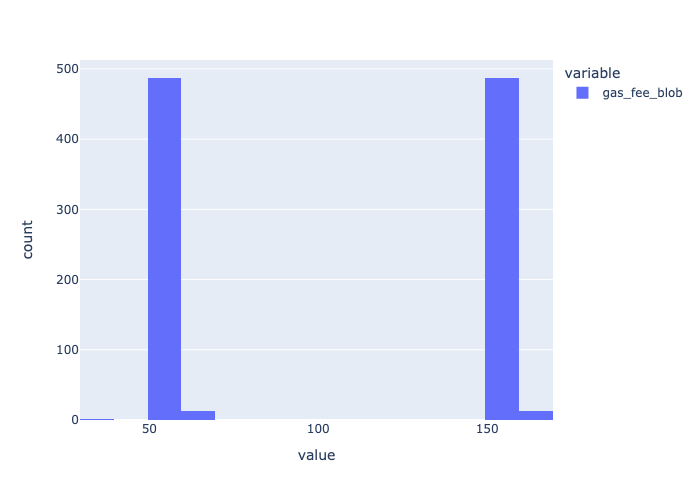

In [17]:
px.histogram(sim_df,
        x=['gas_fee_blob'])

In [18]:
sim_df.gas_fee_l1.min()

35.0

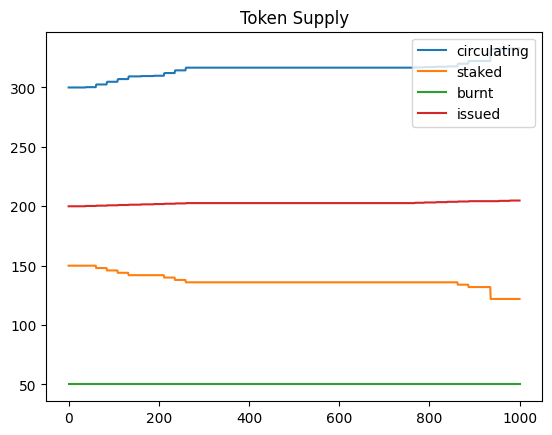

In [19]:
ts_df = sim_df.token_supply.apply(lambda x: pd.Series(x.__dict__))
ts_df.plot(kind='line')
plt.title("Token Supply")
plt.show()

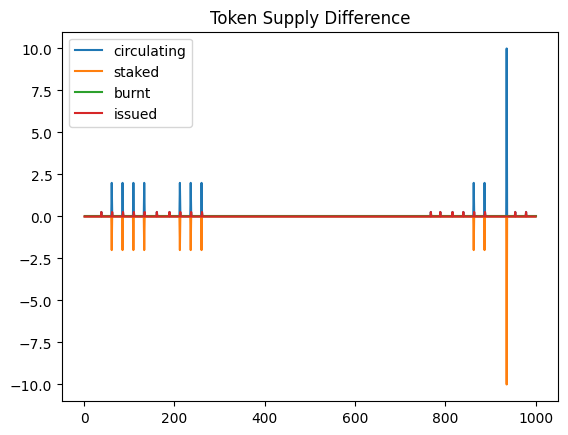

In [20]:
ts_df = sim_df.token_supply.apply(lambda x: pd.Series(x.__dict__)).diff()
ts_df.plot(kind='line')
plt.title("Token Supply Difference")
plt.show()